In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
books_data = pd.read_csv('/content/drive/MyDrive/Preprocessed_data.csv')

In [3]:
books_data.head(2)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada


In [4]:
books_data.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
books_data.head(2)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada


In [6]:
books_data.shape

(1031175, 18)

In [7]:
books_data.columns

Index(['user_id', 'location', 'age', 'isbn', 'rating', 'book_title',
       'book_author', 'year_of_publication', 'publisher', 'img_s', 'img_m',
       'img_l', 'Summary', 'Language', 'Category', 'city', 'state', 'country'],
      dtype='object')

In [8]:
books_data.isnull().sum()

user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                   14103
state                  22798
country                35374
dtype: int64

In [9]:
books_data.dtypes

user_id                  int64
location                object
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication    float64
publisher               object
img_s                   object
img_m                   object
img_l                   object
Summary                 object
Language                object
Category                object
city                    object
state                   object
country                 object
dtype: object

In [10]:
books_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1031175.0,140594.373956,80524.435020,2.0,70415.0,141210.0000,211426.0,278854.0
age,1031175.0,36.429017,10.353539,5.0,31.0,34.7439,41.0,99.0
rating,1031175.0,2.839022,3.854149,0.0,0.0,0.0000,7.0,10.0
year_of_publication,1031175.0,1995.282684,7.309340,1376.0,1992.0,1997.0000,2001.0,2008.0


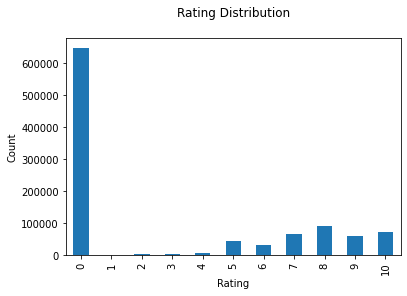

In [11]:
# distribution variable 'rating'

books_data.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
# the new variable "country" contains missing values that will be set to "Unknown"
books_data.loc[books_data.country.isnull(),'country']='unknown'

In [13]:
books_data.isnull().sum()

user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                   14103
state                  22798
country                    0
dtype: int64

In [14]:
# Change type from float to integer
books_data['age'] = books_data['age'].astype(np.int64)

In [15]:
books_data['age'].dtypes

dtype('int64')

In [16]:
# drop the irrelant variables (images)
books_data = books_data.drop(['img_s', 'img_m', 'img_l'], axis=1)

In [17]:
# print unique values in 'year of publication' (see 2 strings and several 0 values)
#print(sorted(items_df['year_of_publication'].unique())) this line is giving me an error
print(books_data['year_of_publication'].unique().tolist())

[2002.0, 2001.0, 1991.0, 1999.0, 2000.0, 1993.0, 1996.0, 1988.0, 2004.0, 1998.0, 1994.0, 2003.0, 1997.0, 1987.0, 1989.0, 1992.0, 1983.0, 1979.0, 1995.0, 1982.0, 1985.0, 1986.0, 1978.0, 1980.0, 1952.0, 1990.0, 1981.0, 1984.0, 1968.0, 1961.0, 1959.0, 1946.0, 1974.0, 1958.0, 1976.0, 1971.0, 1977.0, 1975.0, 1965.0, 1941.0, 1970.0, 1972.0, 1953.0, 1962.0, 1973.0, 1960.0, 1954.0, 1966.0, 1920.0, 1967.0, 1956.0, 1942.0, 1955.0, 1951.0, 1969.0, 1948.0, 1963.0, 1964.0, 1950.0, 2005.0, 1943.0, 1957.0, 1937.0, 1940.0, 1930.0, 1923.0, 1945.0, 1947.0, 1936.0, 1925.0, 1927.0, 1939.0, 1926.0, 1938.0, 1911.0, 1904.0, 1949.0, 1932.0, 1929.0, 1944.0, 1933.0, 1922.0, 1897.0, 1902.0, 1924.0, 1921.0, 1900.0, 1928.0, 2006.0, 1901.0, 1931.0, 1378.0, 1908.0, 1909.0, 2008.0, 1935.0, 1376.0, 1906.0, 1806.0, 1917.0, 1919.0, 1914.0, 1934.0, 1910.0]


In [18]:
# Change type from float to integer
books_data['year_of_publication'] = books_data['year_of_publication'].astype(np.int64)

In [19]:
books_data['year_of_publication'].dtypes

dtype('int64')

In [20]:
# Replace inconsistent values (values below 1800 and above 2004 will be replaced with the mean value)
books_data.loc[(books_data['year_of_publication'] == 0)|(books_data['year_of_publication'] > 2004) | (books_data['year_of_publication'] < 1800), 'year_of_publication' ] = np.nan
books_data['year_of_publication'] = books_data['year_of_publication'].fillna(round(books_data['year_of_publication'].mean()))

In [21]:
books_data['city'] = books_data['city'].fillna('unknown')
books_data['state'] = books_data['state'].fillna('unknown')

In [22]:
books_data = books_data.drop(['location'], axis=1)

In [23]:
books_data.isnull().sum()

user_id                0
age                    0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
Summary                0
Language               0
Category               0
city                   0
state                  0
country                0
dtype: int64

In [24]:
books_data

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,2,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,8,34,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,11400,49,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,11676,34,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],unknown,unknown,unknown
4,41385,34,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,278851,33,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa
1031171,278851,33,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa
1031172,278851,33,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,9,9,9,dallas,texas,usa
1031173,278851,33,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa


In [25]:
books_data.duplicated().sum()

0

In [26]:
books_data.shape

(1031175, 14)

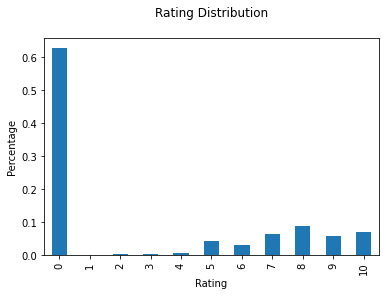

In [27]:
# let's take a look at the percentage frequency of the ratings
books_data.rating.value_counts(sort=False, normalize=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()


In [28]:
# Seperate the explicit ratings represented by 1–10 and implicit ratings represented by 0
ratings_explicit_df= books_data[books_data['rating'] != 0]
ratings_implicit_df= books_data[books_data['rating'] == 0]


In [29]:
print('Explicit ratings:', len(ratings_explicit_df))
print('Implicit ratings:', len(ratings_implicit_df))

Explicit ratings: 383852
Implicit ratings: 647323


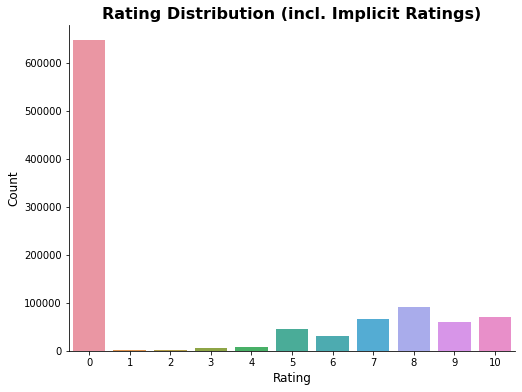

In [30]:
# Distribution implicit and explicit ratings
plt.figure(figsize=(8,6))
sns.countplot(x='rating', data=books_data)
sns.despine(top=True, right=True)
plt.title('Rating Distribution (incl. Implicit Ratings)', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12);

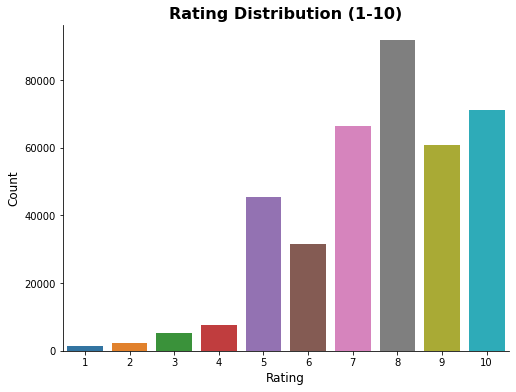

In [31]:
# Distribution explicit ratings
plt.figure(figsize=(8,6))
#sns.countplot(x='rating', data=ratings_explicit_df, palette='crest')
sns.countplot(x='rating', data=ratings_explicit_df)
sns.despine(top=True, right=True)
plt.title('Rating Distribution (1-10)', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12);

In [32]:
data = books_data['year_of_publication'].value_counts().head(50).reset_index()
data.columns=['year','count']
data.head()

,year,count
0,2002.0,91801
1,2001.0,79803
2,1999.0,75195
3,2003.0,72539
4,2000.0,72334


Text(0.5, 1.0, 'Years of publishing')

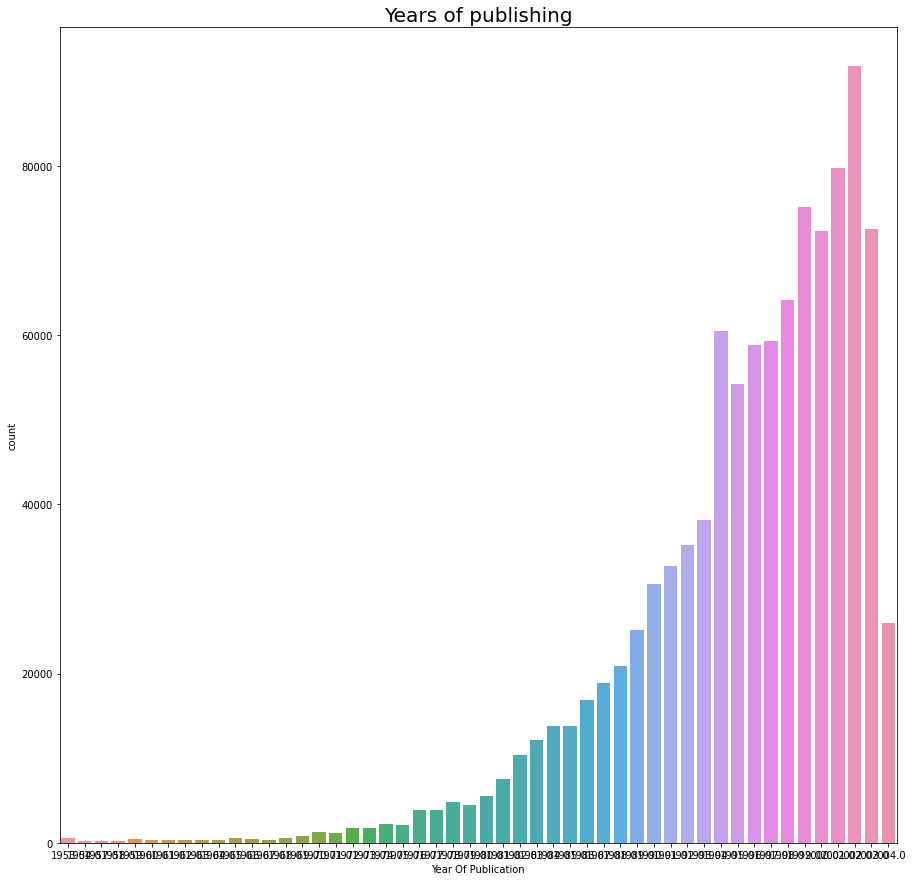

In [33]:
plt.figure(figsize=(15,15))
sns.barplot(x='year',y='count',data=data)
plt.xlabel('Year Of Publication')
plt.title('Years of publishing',size=20)

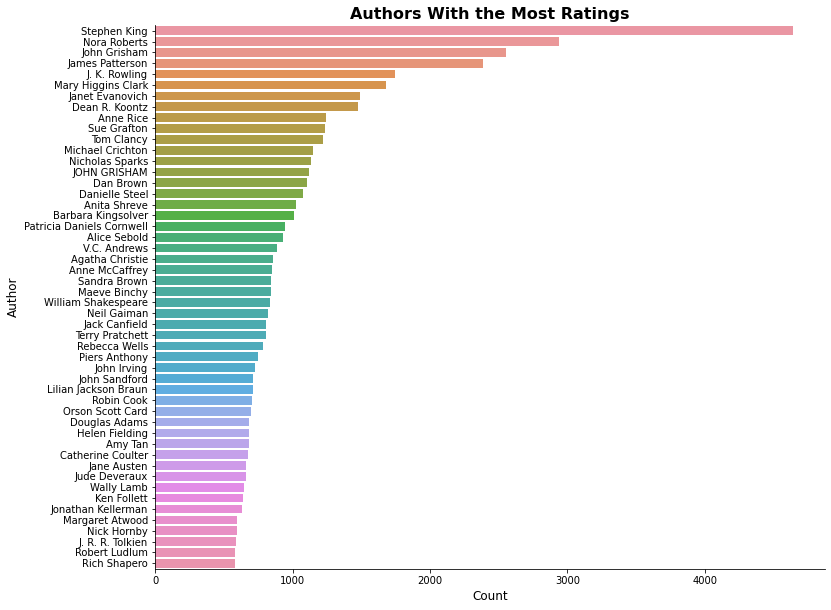

In [34]:
data=ratings_explicit_df['book_author'].value_counts().head(50).reset_index()
data.columns=['author','count']
plt.figure(figsize=(12,10))
#sns.barplot(x='count',y='author',data=data, palette='crest')
sns.barplot(x='count',y='author',data=data)
sns.despine(top=True, right=True)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.title('Authors With the Most Ratings', fontsize=16, weight='bold');

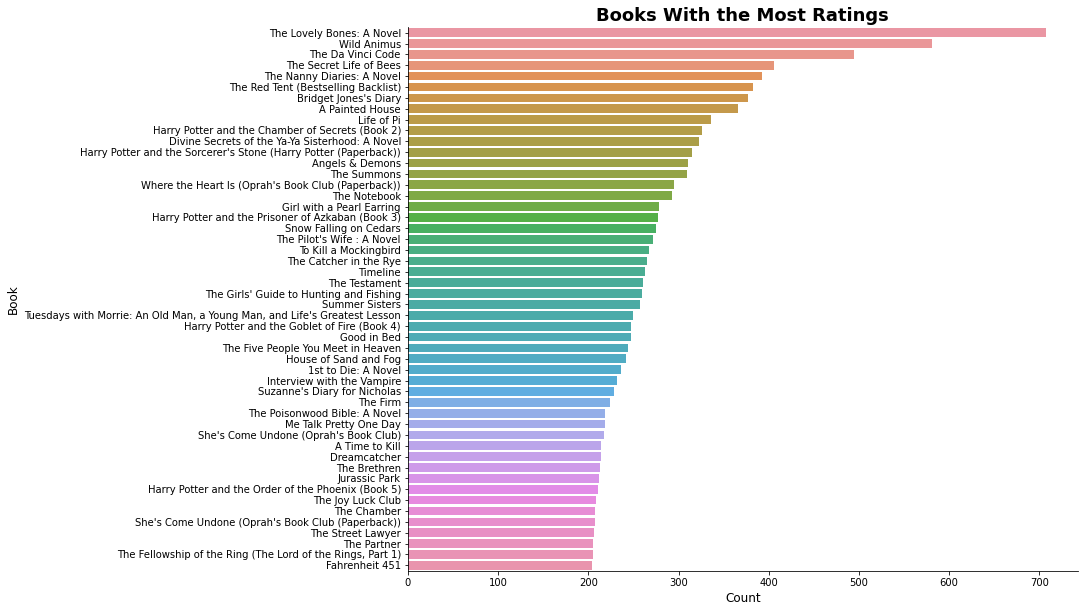

In [35]:
data=ratings_explicit_df['book_title'].value_counts().head(50).reset_index()
data.columns=['book','count']
plt.figure(figsize=(12,10))
#sns.barplot(x='count',y='book',data=data, palette='crest')
sns.barplot(x='count',y='book',data=data)
sns.despine(top=True, right=True)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Book', fontsize=12)
plt.title('Books With the Most Ratings', fontsize=18, weight='bold');

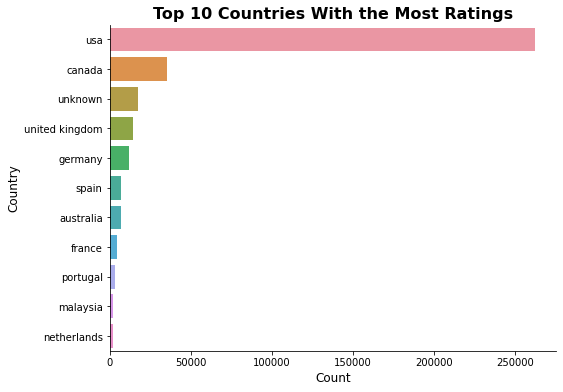

In [36]:
data=ratings_explicit_df['country'].value_counts().head(11).reset_index()
data.columns=['country','count']
plt.figure(figsize=(8,6))
#sns.barplot(x='count',y='country',data=data, palette='crest')
sns.barplot(x='count',y='country',data=data)
sns.despine(top=True, right=True)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Countries With the Most Ratings', fontsize=16, weight='bold');

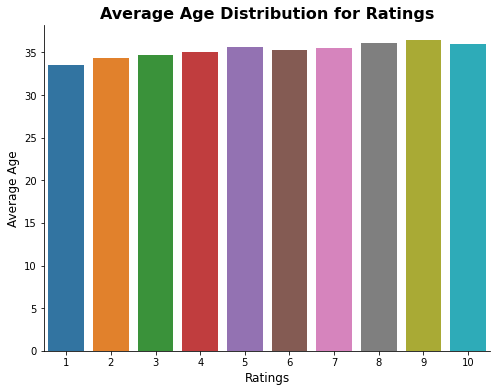

In [37]:
data = ratings_explicit_df.groupby('rating')['age'].mean().reset_index()
data['rating']=data['rating'].astype(int)
plt.figure(figsize=(8,6))
#sns.barplot(x='rating',y='age',data=data, palette='crest')
sns.barplot(x='rating',y='age',data=data)
sns.despine(top=True, right=True)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age Distribution for Ratings', fontsize=16, weight='bold');

In [38]:
# making another copy of the explicit ratings data set
explic_rat=ratings_explicit_df.copy()

In [39]:
bins = [0,20,40,60,80,110]
labels = ['0-19','20-39','40-59','60-79','80+']
explic_rat['age_group'] = pd.cut(explic_rat['age'], bins=bins, labels=labels, right=False)

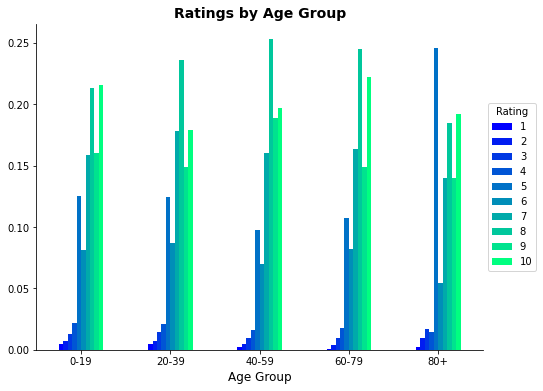

In [40]:
crosstab1=pd.crosstab(explic_rat.age_group, explic_rat.rating, rownames=['Age Group'], colnames=['Rating'], margins=False, normalize='index')
#crosstab1.plot.bar(cmap='crest', figsize=(8,6))
crosstab1.plot.bar(cmap='winter', figsize=(8,6))
sns.despine(top=True, right=True)
plt.title('Ratings by Age Group', fontsize = 14, weight = 'bold')
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc = 'center left', title='Rating', bbox_to_anchor=(1, 0.5));

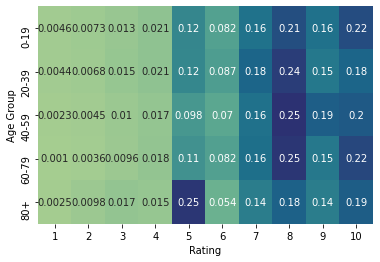

In [41]:
sns.heatmap(crosstab1, cmap="crest", annot=True, cbar=False);

In [42]:
age_group=explic_rat['age_group'].value_counts().to_frame().reset_index().rename(columns={'index':'age_group','age_group':'Count'})

In [43]:
import plotly.express as px
import plotly.graph_objects as go

In [44]:
fig = go.Figure(data=[go.Scatter(
    x=age_group['age_group'], y=age_group['Count'],
    mode='markers',
    marker=dict(
        color=age_group['Count'],
        size=age_group['Count']*0.002,
        showscale=True
    ))])

fig.update_layout(autosize=False,width=800,height=600, title='Age Distribution',xaxis_title='Age Group',yaxis_title='Number Of Users',title_x=0.5)
fig.update_xaxes(categoryorder='category ascending')
fig.show()

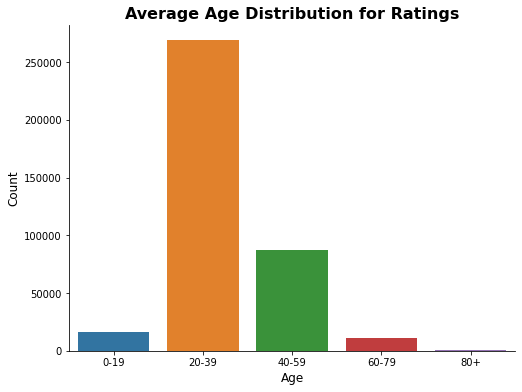

In [45]:
data2 = explic_rat.groupby('age_group')['age'].count().reset_index()
#data2['rating']=data2['rating'].astype(int)
plt.figure(figsize=(8,6))
#sns.barplot(x='age_group',y='age',data=data2, palette='crest')
sns.barplot(x='age_group',y='age',data=data2)
sns.despine(top=True, right=True)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Average Age Distribution for Ratings', fontsize=16, weight='bold');

In [46]:
users_ratings=ratings_explicit_df['user_id'].value_counts()

In [47]:
# find users who have rated the most books on average
users_ratings_avg=ratings_explicit_df[['user_id','rating']].groupby(['user_id']).mean()

In [48]:
users_ratings_avg['rating_count']=pd.DataFrame(ratings_explicit_df.groupby('user_id')['rating'].count())

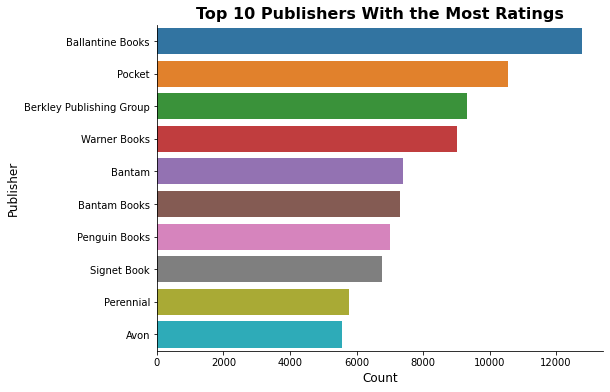

In [49]:
data1=ratings_explicit_df['publisher'].value_counts().head(10).reset_index()
data1.columns=['publisher','count']
plt.figure(figsize=(8,6))
#sns.barplot(x='count',y='publisher', data=data1, palette='crest')
sns.barplot(x='count',y='publisher', data=data1)
sns.despine(top=True, right=True)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.title('Top 10 Publishers With the Most Ratings', fontsize=16, weight='bold');

In [51]:
# first step: define most popular books
book_pop = ratings_explicit_df['book_title'].value_counts()

In [52]:
print(book_pop.head(10))

The Lovely Bones: A Novel                           707
Wild Animus                                         581
The Da Vinci Code                                   494
The Secret Life of Bees                             406
The Nanny Diaries: A Novel                          393
The Red Tent (Bestselling Backlist)                 383
Bridget Jones's Diary                               377
A Painted House                                     366
Life of Pi                                          336
Harry Potter and the Chamber of Secrets (Book 2)    326
Name: book_title, dtype: int64


In [53]:
# find highest rated books on average
book_pop_avg=ratings_explicit_df[['book_title','rating']].groupby(['book_title']).mean()

In [54]:
print(book_pop_avg.sort_values(by='rating', ascending=False).head(8))

                                                    rating
book_title                                                
The 776 Nastiest Things Ever Said                     10.0
Goofy's Big Race Fun-To-Read Library Vol.4            10.0
The Smiling Pets Recipe Book: 101 Easy Make Tre...    10.0
Passion: Photography from the Movie the Passion...    10.0
Goofy Joins the Circus                                10.0
Goofy On Safari Kenya Adventure                       10.0
Goofy Takes Off Switzerland Adventure                 10.0
Goofy and the Gondola                                 10.0


In [55]:
# check only books that have been rated more than 100x 
book_review_pop=book_pop[book_pop > 100].index

In [56]:
# take a subset of the df containing the explicit ratings by selecting only rows referring to 'book_review_pop'
book_pop_df=ratings_explicit_df[ratings_explicit_df['book_title'].isin(book_review_pop)]

In [57]:
# find highest rated books on average
book_pop_avg2=book_pop_df[['book_title','rating']].groupby(['book_title']).mean()

In [58]:
print(book_pop_avg2.sort_values(by='rating', ascending=False).head(7))

                                                      rating
book_title                                                  
The Two Towers (The Lord of the Rings, Part 2)      9.330882
The Return of the King (The Lord of the Rings, ...  9.213592
Harry Potter and the Goblet of Fire (Book 4)        9.125506
Harry Potter and the Sorcerer's Stone (Book 1)      9.062500
Harry Potter and the Order of the Phoenix (Book 5)  9.047393
Harry Potter and the Prisoner of Azkaban (Book 3)   9.043321
To Kill a Mockingbird                               8.977528


In [59]:
# importing surprise and packages
!pip install surprise
from surprise import Reader, Dataset
from surprise import SVD, NMF, KNNBasic, model_selection, accuracy
from surprise.model_selection import cross_validate

     |████████████████████████████████| 11.8 MB 49 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617767 sha256=d107fa6bce0d90282dad47a287219c19969e757554b29eb70cc3179cb26a9929
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [60]:
# current data set
book_final_data = ratings_explicit_df.copy()

book_final_data.shape

(383852, 14)

In [61]:
book_final_data.size

5373928

In [62]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(book_final_data), len(book_final_data['isbn'].unique()), len(book_final_data['user_id'].unique())))

Number of ratings: 383852
Number of books: 149842
Number of users: 68092


In [63]:
# total rating counts
book_counts = book_final_data['rating'].value_counts()
user_counts = book_final_data['user_id'].value_counts()

In [64]:
# check statistics of rating counts per user
user_counts.describe()

count    68092.000000
mean         5.637255
std         41.742776
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6943.000000
Name: user_id, dtype: float64

In [65]:
# Let’s look at the top of the distribution
(user_counts.quantile(np.arange(.9, 1, .01)))

0.90     9.00
0.91    10.00
0.92    12.00
0.93    13.00
0.94    16.00
0.95    19.00
0.96    23.00
0.97    31.00
0.98    44.00
0.99    74.09
Name: user_id, dtype: float64

In [66]:
# set filter
book_final_data = book_final_data[book_final_data['user_id'].isin(user_counts[user_counts >= 50].index)]

In [67]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(book_final_data), len(book_final_data['isbn'].unique()), len(book_final_data['user_id'].unique())))

Number of ratings: 153428
Number of books: 86584
Number of users: 1180


In [68]:
book_final_data.shape

(153428, 14)

In [69]:
book_final_data.head(10)

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
3,11676,34,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],unknown,unknown,unknown
8,116866,34,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,",",unknown
21,110912,36,0374157065,10,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",en,['Medical'],milpitas,california,usa
26,197659,49,0374157065,9,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",en,['Medical'],indiana,pennsylvania,usa
31,11676,34,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],unknown,unknown,unknown
32,29526,26,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],knoxville,tennessee,usa
34,46398,37,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],san antonio,texas,usa
54,230522,52,0399135782,7,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],colorado springs,colorado,usa
58,245827,34,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],albuquerque,",",unknown
64,52614,33,0425176428,8,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,"Essays by respected military historians, inclu...",en,['History'],toccoa,ga.,usa


In [70]:
book_final_data.to_csv(r'book_final_data.csv', index = False)